In [1]:
import nltk
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 


stopwords = set(stopwords.words('english'))
symbols   = ['.', ',', '’','“','”','"', "''" ,"'",'*','``', '&','-',"''",'""','?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"'s","'m"]
stopwords.update(symbols)

In [2]:
time_filter = 'year'
keywords  = "fund"
data = pd.read_csv('./Reddit Data/keywords_'+ time_filter + '_'+ keywords +'.csv')

In [3]:
data

,Date,Name,Score,Title,Content
0,2020-03-12,__justsayin__,596,Fed to pump more than $500 billion into short-...,Dow up almost 1000 points in response...LOL\n\...
1,2020-03-16,cmbscredit,92,"I traded, managed a fixed income credit portfo...",I own my own firm that does proprietary invest...
2,2020-03-25,skilliard7,69,This crisis is a good example of why ETFs> Mut...,"With a mutual fund, you have absolutely 0 cont..."
3,2020-02-18,felloffaraptor,792,If there is a recession and I have super credi...,I would just pay off the loan to keep my credi...
4,2020-02-15,78523985210,431,Are index funds a foolproof way to become a mi...,I currently have $75k in VTSAX and because of ...
...,...,...,...,...,...
244,2020-03-04,ChocolateTsar,424,"Robinhood offers $15 discount, blames outage o...",>The $912 million-funded fintech giant will pr...
245,2020-01-20,UKARCADIA,0,Breakdown and allocation of funds,"Hello, is this a good selection of funds / ass..."
246,2019-12-17,EPIC_FAIL_73,6,I wish they made slightly leveraged (10-25%) i...,NaN
247,2019-09-03,tssenek,148,Pension Funds Are Going To Be Destroyed In The...,"I thought about posting the link, but I can un..."


In [4]:
data = data.dropna()
print("Total available data :",len(data))
filtered_title = []
filtered_content = []
for title, content in zip(data['Title'], data['Content']):
    filtered_title.append([word for word in word_tokenize(title.lower()) if word not in stopwords])
    filtered_content.append([word for word in word_tokenize(content.lower()) if word not in stopwords])


Total available data : 231


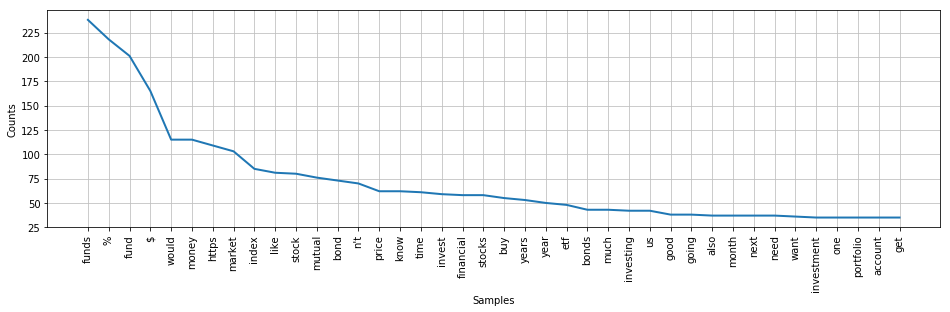

In [5]:
all_filtered_content = sum(filtered_content, [])
fdist_content = nltk.FreqDist(all_filtered_content)
plt.figure(figsize=(16,4))
fdist_content.plot(40,cumulative=False)

In [6]:
df_content = pd.DataFrame.from_dict(fdist_content, orient='index')
df_content.columns = ['Counts']
df_content = df_content.sort_values(by=['Counts'], ascending=False)
df_content

,Counts
funds,238
%,218
fund,201
$,165
money,115
...,...
engaged,1
activity,1
evaluated,1
frequent,1


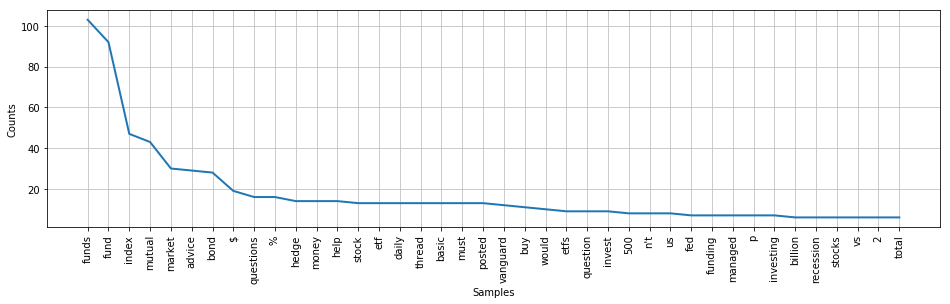

In [7]:
all_filtered_title = sum(filtered_title, [])
fdist_title = nltk.FreqDist(all_filtered_title)
plt.figure(figsize=(16,4))
fdist_title.plot(40,cumulative=False)

In [8]:
df_title = pd.DataFrame.from_dict(fdist_title, orient='index')
df_title.columns = ['Counts']
df_title = df_title.sort_values(by=['Counts'], ascending=False)
df_title

,Counts
funds,103
fund,92
index,47
mutual,43
market,30
...,...
easy,1
tax,1
efficient,1
donate,1
